<a href="https://colab.research.google.com/github/Chocoding1/Machine_Learning_Deep_Learning/blob/main/07_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **신경망 모델 훈련**

## 손실 곡선

케라스의 fit() 메서드는 History 클래스 객체를 반환한다. History 객체에는 훈련 과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어 있습니다. 이 값을 사용하면 그래프를 그릴 수 있다.

In [ ]:
# 먼저 패션 MNIST 데이터셋을 적재하고 훈련 세트와 검증 세트로 분리
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# 모델 생성 함수 정의
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer: # a_layer에 추가 층이 있으면,
    model.add(a_layer) # 기본 은닉층 뒤에 추가
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [ ]:
# 모델 생성
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


그 전에 만들었던 모델과 구조가 동일한 것을 확인할 수 있다.

In [ ]:
# fit() 메서드의 결과를 history 변수에 담기
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

note) verbose=0이란?<br>
verbose : 훈련 과정 출력을 조절 / 기본값은 1로, 에포크마다 진행 막대와 함께 손실 등의 지표 출력<br>
2로 바꾸면 진행 막대를 빼고 출력 / 0으로 나타내면 훈련 과정을 나타내지 않음

history 객체에는 훈련 측정값이 담겨 있는 history 딕셔너리가 들어 있다.

In [ ]:
# history 딕셔너리 확인
print(history.history.keys())
print(history)
print(history.history)

dict_keys(['loss', 'accuracy'])
{'loss': [0.5387542843818665, 0.3946537673473358, 0.3543418347835541, 0.331116259098053, 0.3148989975452423], 'accuracy': [0.8114583492279053, 0.8580208420753479, 0.8736458420753479, 0.8806458115577698, 0.8869166374206543]}


손실과 정확도가 포함되어 있다.<br>
history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순 리스트이다. 따라서 matplotlib을 통해 쉽게 그래프로 그릴 수 있다.

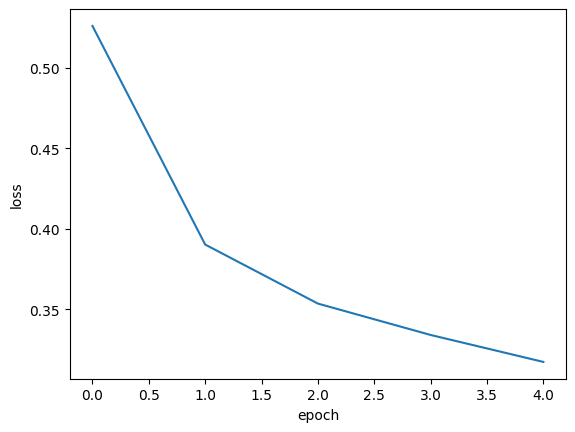

In [ ]:
# 손실 그래프 그리기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

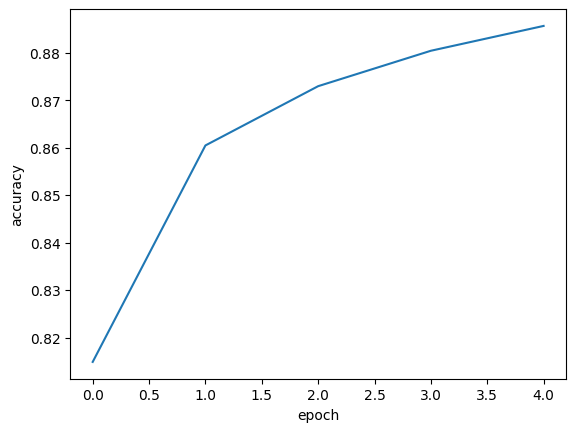

In [ ]:
# 정확도 그래프 그리기
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

계속 손실이 감소하는 중이니, 에포크를 늘려서 더 훈련해보자.

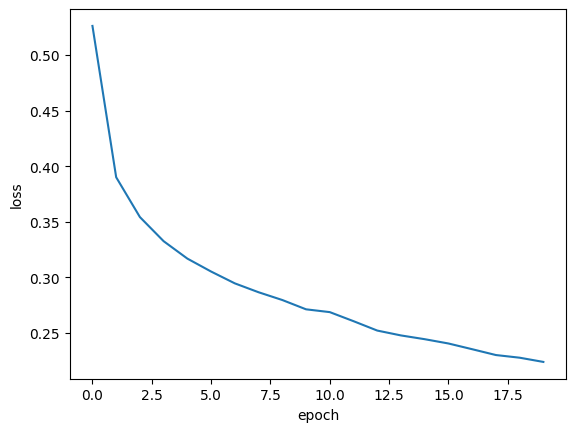

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0) # 에포크 20
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실

인공 신경망은 모두 일종의 경사 하강법을 사용하기 때문에 과대/과소적합과 에포크 사이의 관계에 대한 개념이 적용된다.

에포크에 따른 과대적합과 과소적합을 파악하려면 훈련 세트에 대한 점수뿐만 아니라 검증 세트에 대한 점수도 필요하다. 즉 앞에서처럼 훈련 세트의 손실만 그려서는 안 된다.

4장에서는 정확도를 사용하여 과대/과소적합을 설명했지만 이 장에서는 손실을 사용하여 과대/과소적합을 다루겠다.

note) 손실을 사용하는 것과 정확도를 사용하는 것의 차이는?<br>
인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수이다. 따라서 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 낫다.

에포크마다 검증 손실을 계산하기 위해 케라스 모델의 fit() 메서드에 검증 데이터를 전달할 수 있다.<br>
validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달한다.

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5367 - accuracy: 0.8105 - val_loss: 0.4437 - val_accuracy: 0.8392
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3939 - accuracy: 0.8584 - val_loss: 0.3787 - val_accuracy: 0.8658
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3548 - accuracy: 0.8719 - val_loss: 0.3549 - val_accuracy: 0.8716
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3326 - accuracy: 0.8813 - val_loss: 0.3508 - val_accuracy: 0.8768
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3174 - accuracy: 0.8870 - val_loss: 0.3663 - val_accuracy: 0.8785
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3045 - accuracy: 0.8908 - val_loss: 0.3480 - val_accuracy: 0.8805
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2945 - accuracy: 0.8955 - val_loss: 0.4004 - val_accuracy:

In [ ]:
# 반환된 history.history 딕셔너리에 들어있는 키 확인
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


검증 세트에 대한 손실과 정확도는 'val_loss'와 'val_accuracy'에 들어 있다.

과대/과소적합 문제를 조사하기 위해 훈련 손실과 검증 손실을 한 그래프에 그려보자.

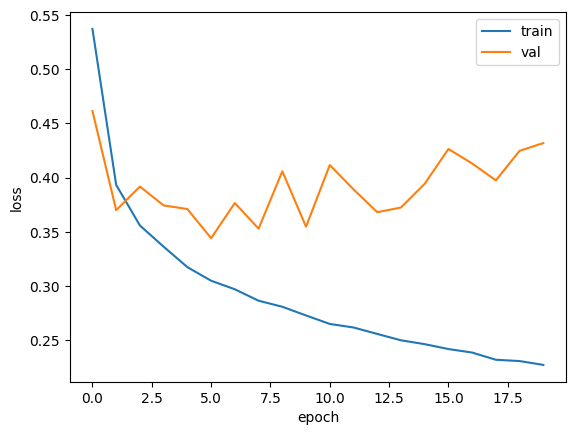

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

검증 손실은 초기에 감소하다가 다섯 번째 에포크부터 다시 상승한다. 반면에 훈련 손실은 꾸준히 감소하기 때문에 전형적인 과대적합 모델이 만들어진다.<br>
검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가할 것이다.

과대적합을 막기 위해 옵티마이저 하이퍼파라미터를 조정해보자.

기본 RMSprop 옵티마이저는 많은 문제에서 잘 동작한다. 이 외의 다른 좋은 옵티마이저는 Adam이다. Adam은 적응적 학습률을 선택하기 때문에 에포크가 진행되면서 학습률의 크기를 조정할 수 있다.

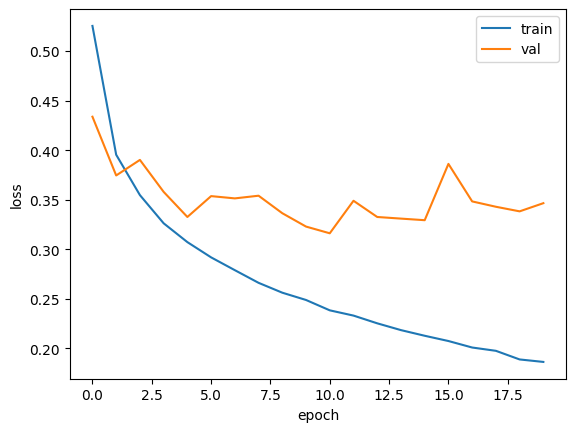

In [ ]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

검증 손실 그래프가 여전히 안정적이지는 않지만 열 번째 에포크까지 전반적인 감소 추세가 이어지고 있다. 과대적합이 훨씬 줄은 것을 보아, Adam 옵티마이저가 이 데이터셋에 잘 맞는다고 할 수 있다.

더 나은 손실 곡선을 얻으려면 학습률을 조정해서 다시 시도해 볼 수도 있다.

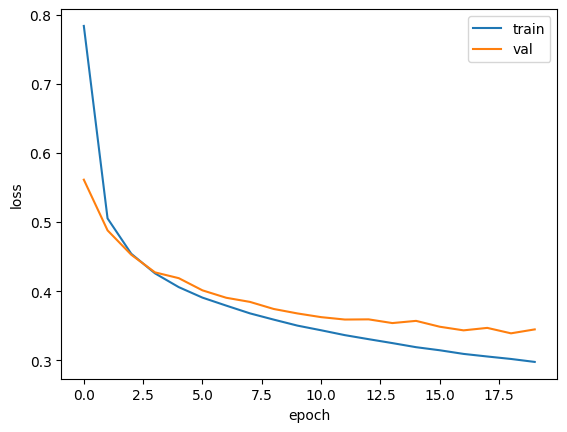

In [ ]:
model = model_fn()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Adam의 learning_rate를 줄여봤는데 과대적합이 거의 사라지네..

## 드롭아웃

훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(즉 뉴런의 출력을 0으로 만들어) 과대적합을 막는 방식<br>
<img src = "https://wikidocs.net/images/page/61374/%EB%93%9C%EB%A1%AD%EC%95%84%EC%9B%83.PNG" height = 250 width = 650><br>
이는 샘플마다 랜덤하게 적용되어 각 샘플마다 꺼지는 뉴런이 다르다. 얼마나 많은 뉴런을 드롭할지는 직접 정해야 하는 하이퍼파라미터이다.

드롭아웃이 왜 과대적합을 막나?<br>
이전 층의 일부 뉴런이 랜덤하게 드롭되면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 한다. 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있다.<br>
또 다른 해석으로는 랜덤하게 드롭아웃된 각각의 모델들을 훈련하는 것은 마치 여러 개의 신경망을 앙상블하는 것과 같다고 생각할 수 있다. 5장에서 보았듯이 앙상블은 과대적합을 막는 좋은 기법이다.

케라스에서는 드롭아웃을 keras.layers 패키지 아래 Dropout 클래스로 제공한다. 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만드는 것이다. 드롭아웃은 층처럼 사용되지만 Flatten 층과 마찬가지로 훈련되는 모델 파라미터는 없다.

In [ ]:
# 모델 생성(model_fn 함수에 드롭아웃 객체 전달)
model = model_fn(keras.layers.Dropout(0.3)) # 30% 정도를 드롭아웃(기본값 0.5)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


위에서 보다시피 드롭아웃 층은 훈련되는 모델 파라미터가 없고, 입력과 출력의 크기가 같다. 즉 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않는다.

물론 훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 적용하면 안 된다. 훈련된 모든 뉴런을 사용해야 올바른 예측을 수행할 수 있기 때문<br>
텐서플로와 케라스는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃을 적용하지 않는다.

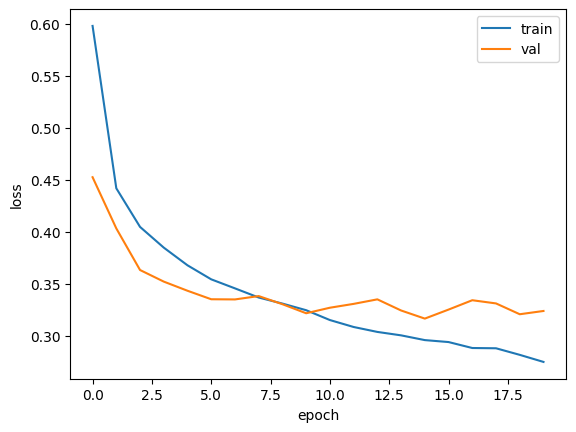

In [ ]:
# 훈련 손실과 검증 손실 그래프 그리기
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

과대적합이 확실히 줄었다. 해당 모델은 20번의 에포크동안 훈련했기 때문에 결국 약간 과대적합 되어 있다. 에포크를 10으로 지정하고 다시 훈련해보자.

## 모델 저장과 복원

훈련한 모델을 나중에 다시 사용하려면 해당 모델을 저장해야 한다.

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weigths() 메서드를 제공한다. 기본적으로 이 메서드는 텐서플로의 체크포인트 포맷으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장한다.

note) '.h5'란?<br>
대용량 데이터를 저장하는 데 사용되는 HDF(계층적 데이터 형식) 중 하나로, 많은 양의 데이터를 다차원 배열 형태로 저장하는 데 사용된다.

In [ ]:
model.save_weights('model-weights.h5')

모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드도 제공한다. 기본적으로 이 메서드는 텐서플로의 SavedModel 포맷으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장한다.

In [ ]:
model.save('model-whole.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# 두 파일이 잘 만들어졌는지 확인
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Oct 10 04:04 model-weights.h5
-rw-r--r-- 1 root root 981176 Oct 10 04:05 model-whole.h5


두 가지 실험을 해보자.
1. 훈련을 하지 않은 새로운 모델을 만들고 model_weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용
2. 아예 model_whole.h5 파일에서 새로운 모델을 만들어 바로 사용

In [ ]:
# 1. 훈련을 하지 않은 새로운 모델을 만들고 model_weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

훈련하지 않은 새로운 모델을 만들고 이전에 저장했던 모델 파라미터를 적재했다.<br>
이때 사용하는 메서드는 save_weight()와 쌍을 이루는 load_weights() 메서드이다.

새로운 모델에 load_weights() 메서드를 사용하려면 save_weights() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야 한다. (그렇지 않으면 에러 발생)<br>
여기에서는 model_fn() 함수를 사용해 동일한 모델을 만들어 사용

해당 모델의 검증 정확도를 확인해보자.<br>
케라스에서 예측을 수행하는 predict() 메서드는 사이킷런과 달리 샘플마다 10개의 클래스에 대한 확률을 반환한다.(패션 MNIST 데이터셋이 다중 분류 문제이기 때문 / 이진 분류 문제라면 양성 클래스에 대한 확률 하나만 반환)

패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플 개수는 12,000개이기 때문에 predict() 메서드는 (12000, 10) 크기의 배열을 반환한다.

10개 확률 중에 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하여 정확도를 계산해보자.

In [ ]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1) # argmax() : 배열에서 가장 큰 값의 인덱스 반환
print(np.mean(val_labels == val_target)) # 가장 큰 값의 인덱스(클래스)와 타깃 클래스가 같으면 1, 다르면 0 / 이를 평균하면 정확도

375/375 [==============================] - 1s 1ms/step
0.8809166666666667


note) evaluate() 메서드를 왜 사용하지 않나?<br>
모델 파라미터를 읽은 후 evaluate() 메서드를 사용하여 정확도를 출력할 수도 있지만, evaluate() 메서드는 손실을 계산하기 위해 반드시 먼저 compile() 메서드를 실행해야 한다.(위에서는 새로운 데이터에 대해 정확도만 계산하면 되는 상황이라고 가정)

두 번째 실험<br>
모델 전체를 파일에서 읽은 다음 검증 세트의 정확도 출력

In [ ]:
# 2. 아예 model_whole.h5 파일에서 새로운 모델을 만들어 바로 사용
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3256 - accuracy: 0.8809


[0.3255999684333801, 0.8809166550636292]

같은 모델을 저장하고 다시 불러들였기 때무에 위와 동일한 정확도 출력

note) 여기에서는 어떻게 evaluate() 메서드를 사용했나?<br>
load_model() 함수는 모델 파라미터뿐만 아니라 모델 구조와 옵티마이저 상태까지 모두 복원하기 때문에 evaluate() 메서드를 사용할 수 있다.

## 콜백

위에서는 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상승하는 지점을 확인하고, 다시 모델을 과대적합되지 않는 에포크만큼 훈련했다.<br>
그러나 이렇게 모델을 두 번씩 훈련하지 않고 한 번에 끝낼 수 있다.

콜백 : 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로, keras.callbacks 패키지 아래에 있는 클래스들이다.<br>
fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용한다.<br>
여기서 사용할 ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장한다. save_best_only 매개변수를 True로 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있다.

In [ ]:
# 저장할 파일 이름을 'best_model.h5'로 지정하여 콜백 적용
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


ModelCheckpoint 클래스 객체 checkpoint_cb를 만든 후 fit() 메서드의 callbacks 매개변수에 리스트로 감싸서 전달한다. 이러면 모델이 훈련한 후에 best-model.h5에 최상의 검증 점수를 낸 모델이 저장된다.

해당 모델을 load_model() 함수로 다시 읽어서 예측을 수행해보자.

In [ ]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 3ms/step - loss: 0.3225 - accuracy: 0.8828


[0.3225385546684265, 0.8828333616256714]

이런 식으로 하니 훨씬 편하다.

하지만 여전히 20번의 에포크 동안 훈련을 한다. 사실 검증 점수가 상승하기 시작하면 과대적합이 더 커지기 때문에 훈련을 계속할 필요가 없다.<br>
이렇게 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 **조기 종료(early stopping)**라고 하며, 딥러닝 분야에서 널리 사용한다. 조기 종료는 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아주기 때문에 규제 방법 중하나로 생각할 수도 있다.

케라스에는 조기 종료를 위한 EarlyStopping 콜백이 있다. 이 콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수를 지정한다. 예를 들어 patience=2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지한다. 또한 restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.

EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있다. 또한 훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌린다.

In [ ]:
# 두 콜백 같이 사용하여 훈련
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
# 이번엔 verbose=0을 지정하지 않음 -> loss, accuracy 출력

Epoch 1/20
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5972 - accuracy: 0.7895 - val_loss: 0.4347 - val_accuracy: 0.8407
Epoch 2/20
  63/1500 [>.............................] - ETA: 3s - loss: 0.4544 - accuracy: 0.8294

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 4s 3ms/step - loss: 0.4413 - accuracy: 0.8408 - val_loss: 0.3823 - val_accuracy: 0.8593
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4040 - accuracy: 0.8527 - val_loss: 0.3734 - val_accuracy: 0.8634
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3841 - accuracy: 0.8613 - val_loss: 0.3600 - val_accuracy: 0.8707
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3671 - accuracy: 0.8661 - val_loss: 0.3428 - val_accuracy: 0.8754
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3562 - accuracy: 0.8701 - val_loss: 0.3417 - val_accuracy: 0.8747
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3443 - accuracy: 0.8728 - val_loss: 0.3298 - val_accuracy: 0.8785
Epoch 8/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3373 - accuracy: 0.8755 - val_loss: 0.3337 - val_accuracy: 0.8738
Epo

훈련을 마치고 나면 몇 번째 에포크에서 훈련이 중지되었는지 early_stopping_cb 객체의 stopped_epoch 속성에서 확인할 수 있다.

In [ ]:
print(early_stopping_cb.stopped_epoch)

8


에포크 횟수가 0에서부터 시작하기 때문에 8은 아홉 번째 에포크에서 훈련이 중지되었다는 것을 의미<br>
patience를 2로 지정했으므로 최상의 모델은 일곱 번째 에포크일 것이다.<br>
- epoch 7's accuracy : 0.8785
- epoch 9's accuracy : 0.8782

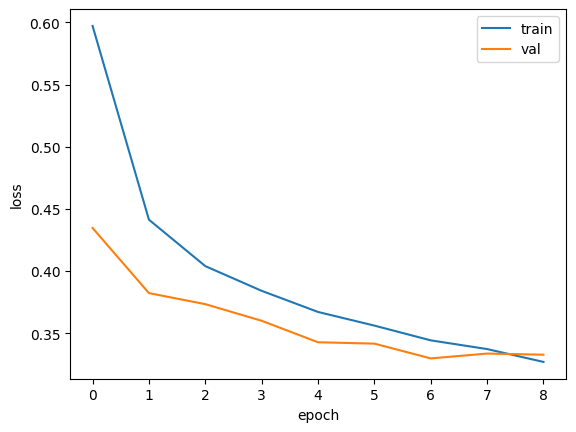

In [ ]:
# 훈련 손실과 검증 손실 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

일곱 번째 에포크에서 가장 낮은 손실을 기록했고, 아홉 번째 에포크에서 훈련이 중지된 것을 볼 수 있다.

이처럼 조기 종료 기법을 사용하면 안심하고 에포크 횟수를 크게 지정해도 괜찮다. 컴퓨터 자원과 시간을 아낄 수 있고 ModelCheckpoint 콜백과 함께 사용하면 최상의 모델을 자동으로 저장해주므로 편리하다.

In [ ]:
# 조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능 확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3298 - accuracy: 0.8785


[0.3297671377658844, 0.8784999847412109]